In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
weather_df = pd.read_csv("D:\Data Science\Weather Data -ML\Adelaide Weather Data.csv",index_col ="DATE")
weather_df.head()

,STATION,NAME,PRCP,TMAX,TMIN
DATE,,,,,
1970-01-01,ASN00023034,"ADELAIDE AIRPORT, AS",0.49,64.0,48.0
1970-01-02,ASN00023034,"ADELAIDE AIRPORT, AS",0.14,68.0,54.0
1970-01-03,ASN00023034,"ADELAIDE AIRPORT, AS",0.07,65.0,53.0
1970-01-04,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,70.0,54.0
1970-01-05,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,70.0,52.0


In [3]:
weather_df.shape

(19293, 5)

In [4]:
weather_df.isnull().sum()

STATION    0
NAME       0
PRCP       3
TMAX       3
TMIN       7
dtype: int64

In [5]:
weather_df =weather_df.ffill()

In [6]:
null_pct = weather_df.apply(pd.isnull).sum()/weather_df.shape[0]*100
null_pct

STATION    0.0
NAME       0.0
PRCP       0.0
TMAX       0.0
TMIN       0.0
dtype: float64

In [7]:
weather_df.dtypes

STATION     object
NAME        object
PRCP       float64
TMAX       float64
TMIN       float64
dtype: object

In [8]:
weather_df.index = pd.to_datetime(weather_df.index)
weather_df.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21',
               '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27'],
              dtype='datetime64[ns]', name='DATE', length=19293, freq=None)

In [9]:
# sorting the year and findinf the number of rows for each year. Leap year will have 366 rows if there are no gaps
weather_df.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    300
Name: DATE, dtype: int64

In [10]:
weather_df["TARGET"] = weather_df.shift(-1)["TMAX"]
weather_df

,STATION,NAME,PRCP,TMAX,TMIN,TARGET
DATE,,,,,,
1970-01-01,ASN00023034,"ADELAIDE AIRPORT, AS",0.49,64.0,48.0,68.0
1970-01-02,ASN00023034,"ADELAIDE AIRPORT, AS",0.14,68.0,54.0,65.0
1970-01-03,ASN00023034,"ADELAIDE AIRPORT, AS",0.07,65.0,53.0,70.0
1970-01-04,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,70.0,54.0,70.0
1970-01-05,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,70.0,52.0,81.0
...,...,...,...,...,...,...
2022-10-23,ASN00023034,"ADELAIDE AIRPORT, AS",0.03,63.0,58.0,66.0
2022-10-24,ASN00023034,"ADELAIDE AIRPORT, AS",0.25,66.0,57.0,65.0
2022-10-25,ASN00023034,"ADELAIDE AIRPORT, AS",0.04,65.0,56.0,65.0


In [11]:
weather_df = weather_df.ffill()
weather_df

,STATION,NAME,PRCP,TMAX,TMIN,TARGET
DATE,,,,,,
1970-01-01,ASN00023034,"ADELAIDE AIRPORT, AS",0.49,64.0,48.0,68.0
1970-01-02,ASN00023034,"ADELAIDE AIRPORT, AS",0.14,68.0,54.0,65.0
1970-01-03,ASN00023034,"ADELAIDE AIRPORT, AS",0.07,65.0,53.0,70.0
1970-01-04,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,70.0,54.0,70.0
1970-01-05,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,70.0,52.0,81.0
...,...,...,...,...,...,...
2022-10-23,ASN00023034,"ADELAIDE AIRPORT, AS",0.03,63.0,58.0,66.0
2022-10-24,ASN00023034,"ADELAIDE AIRPORT, AS",0.25,66.0,57.0,65.0
2022-10-25,ASN00023034,"ADELAIDE AIRPORT, AS",0.04,65.0,56.0,65.0


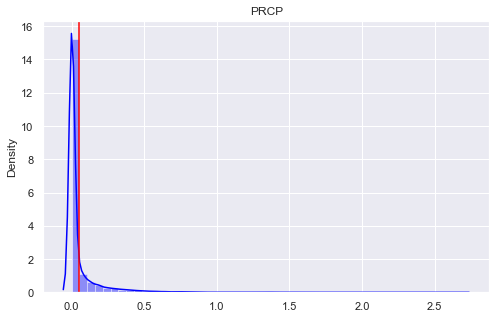

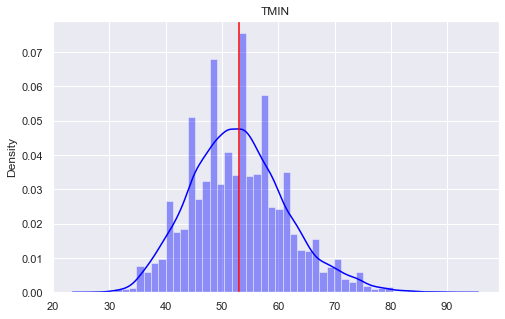

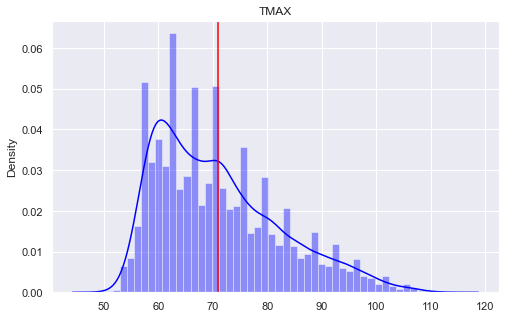

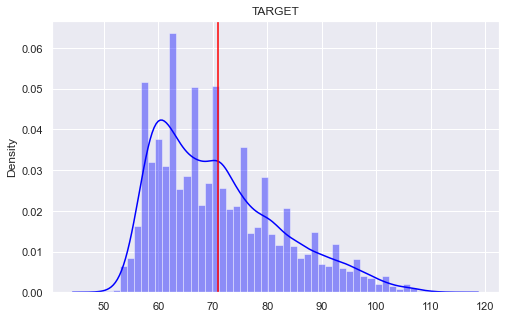

In [12]:
# Investigating the distribution of the numenric data
numeric =['PRCP','TMIN','TMAX','TARGET']
sns.set(rc={'figure.figsize':(8,5)})


for n in numeric:
    x = weather_df[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = weather_df[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

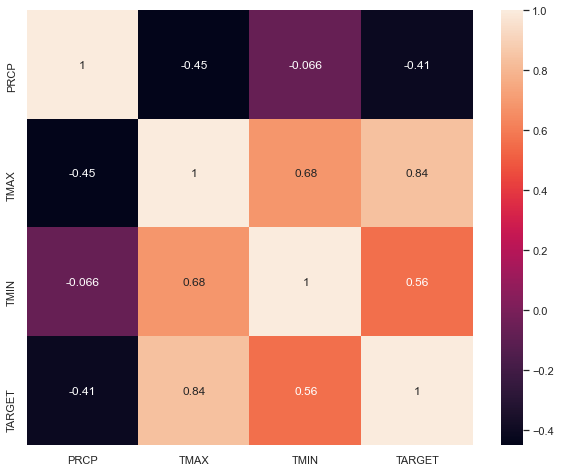

In [13]:
corrmat = weather_df.corr(method = "spearman")
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

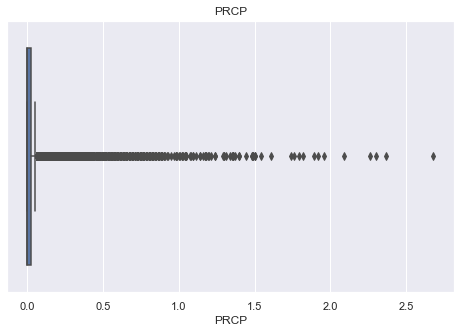

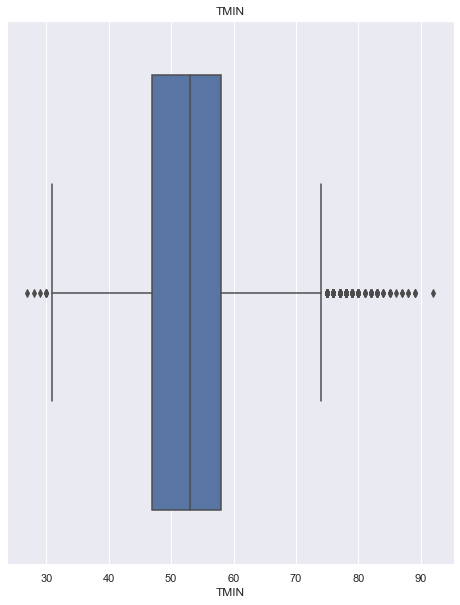

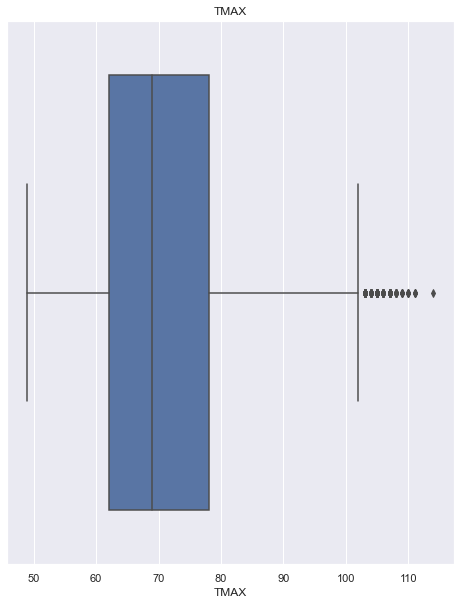

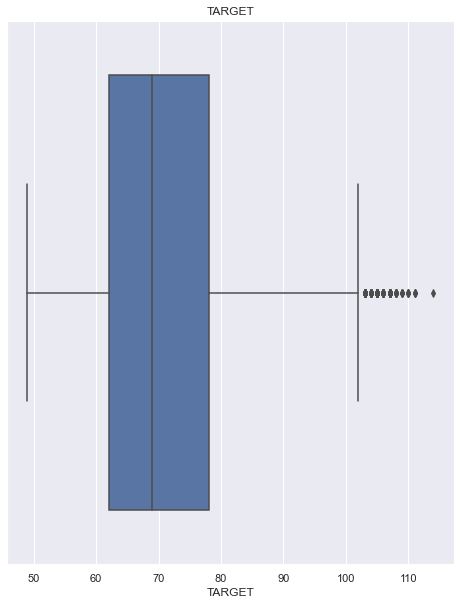

<Figure size 576x720 with 0 Axes>

In [14]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in numeric:
    data=weather_df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(8,10))

In [15]:
IQR=weather_df.PRCP.quantile(0.75)-weather_df.PRCP.quantile(0.25)
lower_bridge=weather_df.PRCP.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_df.PRCP.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.03 0.05


In [16]:
weather_df.loc[weather_df['PRCP']>= 0.05,'PRCP']=0.05
weather_df.loc[weather_df['PRCP']<=-0.03,'PRCP']=-0.03

In [17]:
IQR=weather_df.TMAX.quantile(0.75)-weather_df.TMAX.quantile(0.25)
lower_bridge=weather_df.TMAX.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_df.TMAX.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

38.0 102.0


In [18]:
weather_df.loc[weather_df['TMAX']>= 102.0,'TMAX']=102.0
weather_df.loc[weather_df['TMAX']<=38.0,'TMAX']=38.0

In [19]:
IQR=weather_df.TMIN.quantile(0.75)-weather_df.TMIN.quantile(0.25)
lower_bridge=weather_df.TMIN.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_df.TMIN.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

30.5 74.5


In [20]:
weather_df.loc[weather_df['TMIN']>= 74.5,'TMIN']=74.5
weather_df.loc[weather_df['TMIN']<=30.5,'TMIN']=30.5

In [21]:
IQR=weather_df.TARGET.quantile(0.75)-weather_df.TARGET.quantile(0.25)
lower_bridge=weather_df.TARGET.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_df.TARGET.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

38.0 102.0


In [22]:
weather_df.loc[weather_df['TARGET']>= 102,'TARGET']=102
weather_df.loc[weather_df['TARGET']<=38,'TARGET']=38

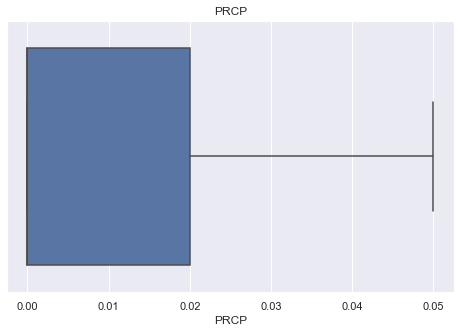

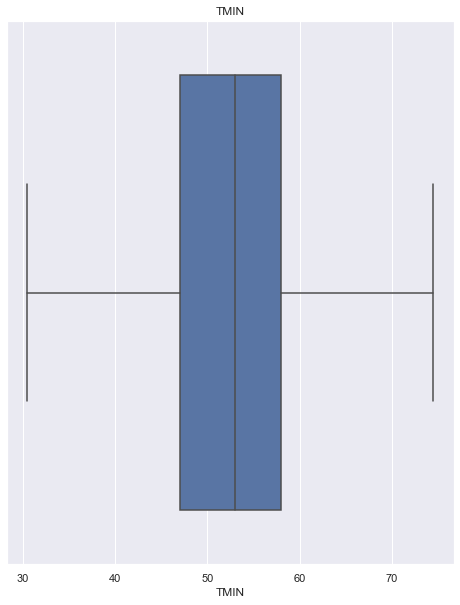

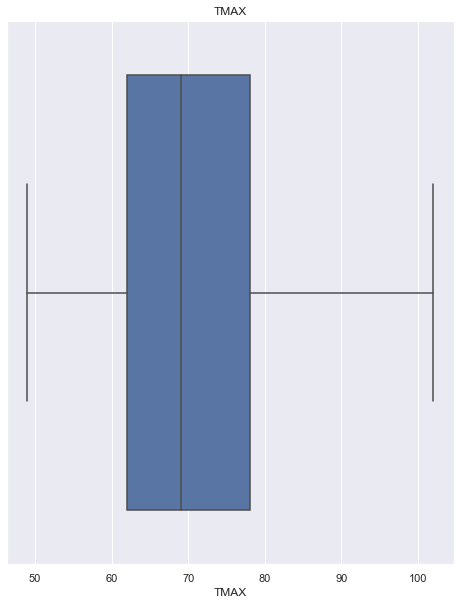

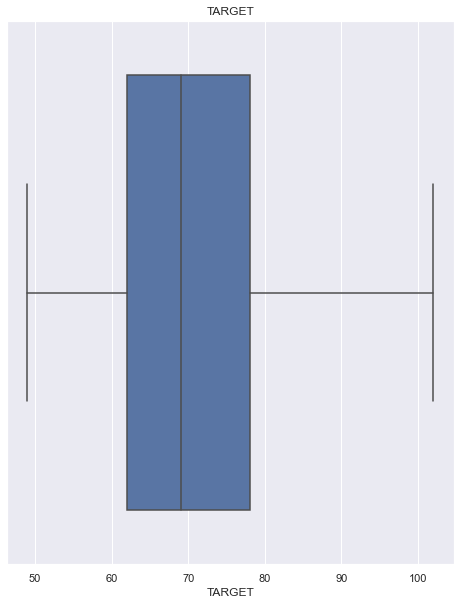

<Figure size 576x720 with 0 Axes>

In [23]:
#Checking the outliers after outlier treatment qith IQR
for feature in numeric:
    data=weather_df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(8,10))

In [24]:
def qq_plots(weather_df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    weather_df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(weather_df[variable], dist="norm", plot=plt)
    plt.show()

PRCP


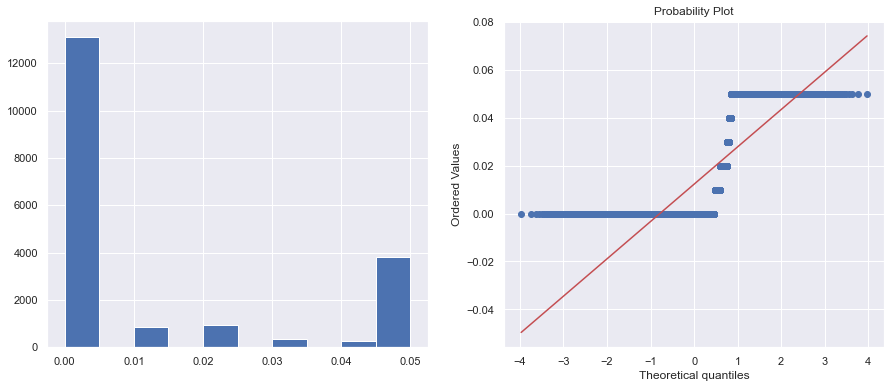

TMIN


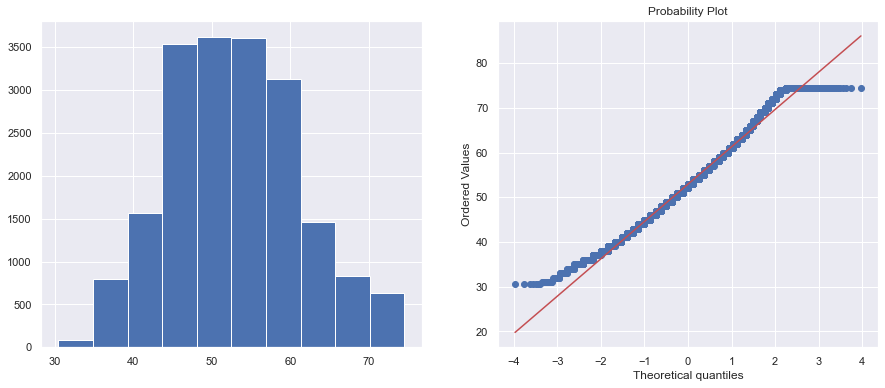

TMAX


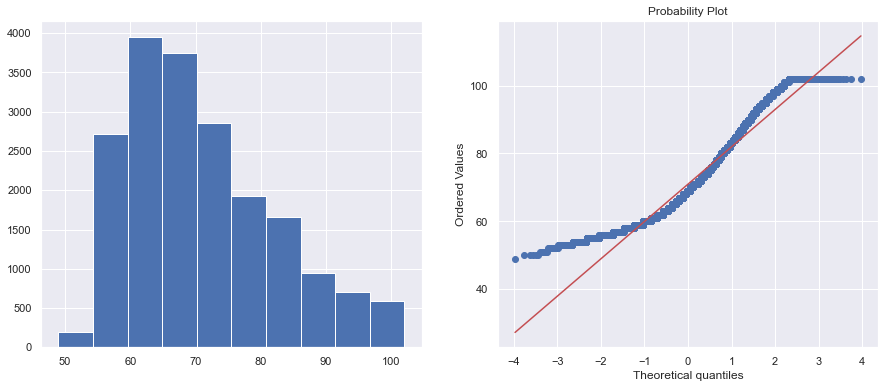

TARGET


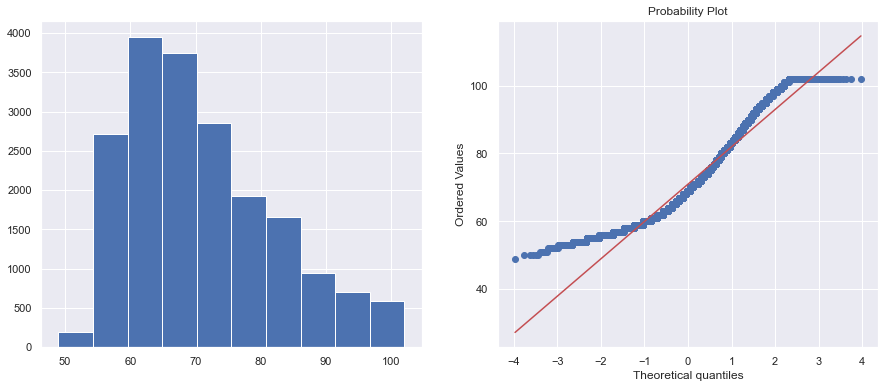

In [25]:
for feature in numeric:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    weather_df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(weather_df[feature], dist="norm", plot=plt)
    plt.show()

In [26]:
weather_df.to_csv("preprocessed_1.csv", index=False)

## Machine Learning Model with Ridge Regression 

In [27]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [44]:
# creating predictor columns  
predictors = weather_df.columns[~weather_df.columns.isin(["TARGET", "NAME", "STATION"])]

Index(['PRCP', 'TMAX', 'TMIN', 'rolling_3_TMAX', 'rolling_3_TMAX_pct',
       'rolling_3_TMIN', 'rolling_3_TMIN_pct', 'rolling_3_PRCP',
       'rolling_3_PRCP_pct', 'rolling_14_TMAX', 'rolling_14_TMAX_pct',
       'rolling_14_TMIN', 'rolling_14_TMIN_pct', 'rolling_14_PRCP',
       'rolling_14_PRCP_pct', 'month_avg_TMAX', 'day_avg_TMAX',
       'month_avg_TMIN', 'day_avg_TMIN', 'month_avg_PRCP', 'day_avg_PRCP'],
      dtype='object')

We will be doing backtesting to account for the time series nature of the data 

In [29]:
def backtest(weather_df, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather_df.shape[0], step):
        train = weather_df.iloc[:i,:]
        test = weather_df.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["TARGET"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["TARGET"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [30]:
predictions = backtest(weather_df, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,74.0,75.625447,1.625447
1979-12-31,76.0,72.391198,3.608802
1980-01-01,82.0,75.155327,6.844673
1980-01-02,83.0,80.055055,2.944945
1980-01-03,83.0,80.549320,2.450680
...,...,...,...
2022-10-23,66.0,63.872634,2.127366
2022-10-24,65.0,65.762267,0.762267
2022-10-25,65.0,65.281504,0.281504


In [31]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

5.037016556896298

__With mean absolute error we can see that with our predictions we are 5 degrees off from the actual temperature__

In [32]:
predictions.sort_values("diff", ascending=False)


,actual,prediction,diff
DATE,,,
1986-11-25,67.0,95.469812,28.469812
1988-11-02,66.0,93.664879,27.664879
2019-11-20,69.0,95.600927,26.600927
2019-10-05,63.0,89.551446,26.551446
1994-11-19,64.0,90.438410,26.438410
...,...,...,...
2017-08-06,59.0,58.998511,0.001489
1984-07-10,59.0,59.001464,0.001464
2010-10-17,62.0,62.001441,0.001441


In [33]:
pd.Series(rr.coef_, index=predictors)

PRCP   -27.927198
TMAX     0.802053
TMIN    -0.042018
dtype: float64

## Improving the accuracy 

We can improve the accuracy by calculating the average temparature and precipitation in the past few days - 3 days and 14 days 
and looking into how the current day temprature compares with these past days. 

In [34]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather_df, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather_df[label] = weather_df[col].rolling(horizon).mean()
    weather_df[f"{label}_pct"] = pct_diff(weather_df[label], weather_df[col])
    return weather_df
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["TMAX", "TMIN", "PRCP"]:
        weather_df = compute_rolling(weather_df, horizon, col)

In [35]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["TMAX", "TMIN", "PRCP"]:
    weather_df[f"month_avg_{col}"] = weather_df[col].groupby(weather_df.index.month, group_keys=False).apply(expand_mean)
    weather_df[f"day_avg_{col}"] = weather_df[col].groupby(weather_df.index.day_of_year, group_keys=False).apply(expand_mean)

In [36]:
weather_df = weather_df.iloc[14:,:]
weather_df = weather_df.fillna(0)

In [37]:
predictors = weather_df.columns[~weather_df.columns.isin(["TARGET", "NAME", "STATION"])]

In [38]:
predictions = backtest(weather_df, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.631854281956255

In [39]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2002-01-10,70.0,94.399450,24.399450
1996-11-30,94.0,69.870521,24.129479
2004-10-11,99.0,75.120082,23.879918
2019-10-03,92.0,68.164131,23.835869
1986-11-25,67.0,90.607572,23.607572
...,...,...,...
2001-07-20,58.0,57.998922,0.001078
2021-01-27,83.0,82.998971,0.001029
1996-02-03,80.0,80.000903,0.000903


In [40]:
weather_df.loc["1990-03-07": "1990-03-17"]

,STATION,NAME,PRCP,TMAX,TMIN,TARGET,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,,,,
1990-03-07,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,75.0,50.0,91.0,79.000000,-0.050633,62.333333,-0.197861,0.000000,0.0,83.071429,-0.097163,64.714286,-0.227373,0.006429,-1.000000,78.121212,81.619048,57.908293,60.619048,0.007225,0.003333
1990-03-08,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,91.0,56.0,75.0,80.333333,0.132780,57.000000,-0.017544,0.000000,0.0,83.285714,0.092624,63.714286,-0.121076,0.006429,-1.000000,78.141720,80.047619,57.905255,59.476190,0.007213,0.007619
1990-03-09,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,75.0,61.0,86.0,80.333333,-0.066390,55.666667,0.095808,0.000000,0.0,82.714286,-0.093264,63.642857,-0.041526,0.006429,-1.000000,78.136725,78.238095,57.910175,59.571429,0.007202,0.004762
1990-03-10,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,86.0,62.0,71.0,84.000000,0.023810,59.666667,0.039106,0.000000,0.0,82.642857,0.040622,63.857143,-0.029083,0.006429,-1.000000,78.149206,80.619048,57.916667,58.119048,0.007190,0.001905
1990-03-11,ASN00023034,"ADELAIDE AIRPORT, AS",0.02,71.0,61.0,72.0,77.333333,-0.081897,61.333333,-0.005435,0.006667,2.0,81.357143,-0.127305,63.285714,-0.036117,0.007857,1.545455,78.137876,80.380952,57.921553,60.690476,0.007211,0.005714
1990-03-12,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,72.0,55.0,73.0,76.333333,-0.056769,59.333333,-0.073034,0.006667,-1.0,80.928571,-0.110327,62.500000,-0.120000,0.007857,-1.000000,78.128165,77.571429,57.916930,58.357143,0.007199,0.007143
1990-03-13,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,73.0,56.0,73.0,72.000000,0.013889,57.333333,-0.023256,0.006667,-1.0,80.500000,-0.093168,61.642857,-0.091541,0.005000,-1.000000,78.120063,79.047619,57.913902,57.500000,0.007188,0.005714
1990-03-14,ASN00023034,"ADELAIDE AIRPORT, AS",0.00,73.0,55.0,71.0,72.666667,0.004587,55.333333,-0.006024,0.000000,0.0,80.214286,-0.089938,61.000000,-0.098361,0.001429,-1.000000,78.111987,77.714286,57.909306,58.238095,0.007177,0.007619
1990-03-15,ASN00023034,"ADELAIDE AIRPORT, AS",0.01,71.0,59.0,74.0,72.333333,-0.018433,56.666667,0.041176,0.003333,2.0,79.714286,-0.109319,60.642857,-0.027091,0.002143,3.666667,78.100787,75.904762,57.911024,57.904762,0.007181,0.013810


<AxesSubplot:>

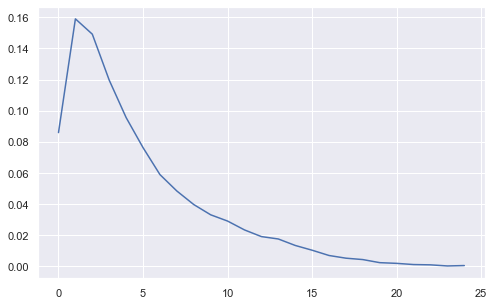

In [41]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [42]:
predictions

,actual,prediction,diff
DATE,,,
1980-01-13,83.0,80.405891,2.594109
1980-01-14,72.0,83.480607,11.480607
1980-01-15,77.0,75.509562,1.490438
1980-01-16,95.0,81.024648,13.975352
1980-01-17,70.0,90.293414,20.293414
...,...,...,...
2022-10-23,66.0,65.254970,0.745030
2022-10-24,65.0,67.319739,2.319739
2022-10-25,65.0,66.413389,1.413389


In [43]:
pd.Series(rr.coef_, index=predictors)

PRCP                   -7.168625
TMAX                    0.680991
TMIN                   -1.191933
rolling_3_TMAX          0.595651
rolling_3_TMAX_pct     52.087303
rolling_3_TMIN          0.362149
rolling_3_TMIN_pct     11.847096
rolling_3_PRCP        -19.355019
rolling_3_PRCP_pct      0.211772
rolling_14_TMAX        -0.601452
rolling_14_TMAX_pct   -51.924870
rolling_14_TMIN         0.666892
rolling_14_TMIN_pct    34.331889
rolling_14_PRCP        -5.540316
rolling_14_PRCP_pct    -0.107807
month_avg_TMAX          0.242244
day_avg_TMAX            0.113785
month_avg_TMIN          0.013015
day_avg_TMIN            0.056734
month_avg_PRCP        -13.267715
day_avg_PRCP           -2.943283
dtype: float64